# Cleaning and Analysis of Employee Exit Surveys

The project entails cleaning and analysing exit surveys from employees of the Department of Education, Training and Employment(DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

The main goal of the stakeholders is to answer the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?



In [2]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete-survey.csv')

In [3]:
dete_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.head(90)
print(dete_survey)

      ID                        SeparationType Cease Date DETE Start Date  \
0      1                 Ill Health Retirement    08/2012            1984   
1      2      Voluntary Early Retirement (VER)    08/2012      Not Stated   
2      3      Voluntary Early Retirement (VER)    05/2012            2011   
3      4             Resignation-Other reasons    05/2012            2005   
4      5                        Age Retirement    05/2012            1970   
..   ...                                   ...        ...             ...   
817  819                        Age Retirement    02/2014            1977   
818  820                        Age Retirement    01/2014            1980   
819  821  Resignation-Move overseas/interstate    01/2014            2009   
820  822                 Ill Health Retirement    12/2013            2001   
821  823  Resignation-Move overseas/interstate    12/2013      Not Stated   

    Role Start Date                                      Position  \
0     

In [5]:

tafe_survey = pd.read_csv("tafe-survey.csv", encoding='latin1')

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

In [7]:
pd.options.display.max_columns = 90
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

The data in dete_survey has responses marked as not stated indicating values that are missing but not represented by NaN
There are columns covvering Age, Gender, Ethninicity and location that do not enable us to answer the core questions but could be useful in providing more nuance to the nature of employees.


# Drop Missing Values and Unecessary Columns

In [10]:
# Reading "Not Stated" value as "NaN"
dete_survey = pd.read_csv("dete-survey.csv", na_values="Not Stated")

#Removal of columns not needed for analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
#Removal of columns from tafe data set that was not needed for analysis
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Renaming of Columns

In [13]:
#Cleaning column Names

dete_survey_updated.columns =dete_survey_updated.columns.str.replace(' ', "_").str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [20]:
# Matching column names across dete and tafe datasets

renames = {'Record ID':'id', "CESSATION YEAR": 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?':'gender', "CurrentAge. Current Age": 'age', 'Employment Type. Employment Type': 'employment status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute(in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace(in years)': 'role_service'}

#updating column names for tafe dataset
tafe_survey_updated = tafe_survey_updated.rename(renames, axis=1)

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [21]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filtering Data

In [22]:
# checking value counts for separationtype column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [23]:
# checking value counts for separation type
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [25]:
# updating all separation types containting the word "Resignation" to "Resignation"
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [26]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# Data Verification

This entails and exploration of the cease_date and the dete_start_date to ensure the soundness of the data across all years. The criteria to be used is:

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940


In [28]:
# Extract the years and convert them to float type
dete_resignations["cease_date"] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [31]:
# Check the unique values and look for outliers
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [34]:
# check for unique values
tafe_resignations['cease_date'].value_counts().sort_values()


2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

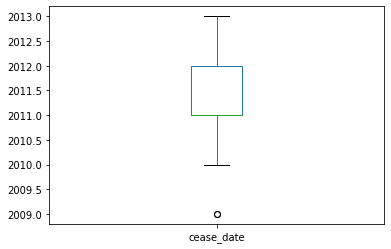

In [39]:
info = tafe_resignations['cease_date'].plot.box()

From comparing the cease_dates in between the tafe_survey_updated and dete_survey_updated dataset we find out:

- The dete and tafe dataframes do not align.
- The tafe_survey_updated has cease dates in 2009 while the dete_survey_updated dataframe does not.
- The tafe_survey_Updated has cease_dates in 2011 while the dete_survey_updated dataframe has none.
- The dete_survey_updated has cease_dates in 2006 while the tafe_survey_updated dataframe doesn't.
- The dete_survey_updated has cease_dates in 2014 while the tafe_survey_updated dataframe doesn't.

## Creation of A new Column

The next step is to create a column with the length of time an employee has spent in their workplace in terms of years of service across both data frames.

 -  The main goal is to answer: Are employees who have only worked for the institutes for a short period of time       resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
 
The tafe_resignations dataframe already has a column called "service", which was renamed to "institute service".To analyse both surveys together, we will have a corresponding "institute service" column in "dete_resignations". 


In [103]:
# calculation of the length of time an employee spent in thee
# Calculate the length of time an employee spent in their respective workplace and create a new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Quick check of the result
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [112]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,service_length
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,3.0


## Idenfication of Dissatisfied Employees

The next step enatils identification of dissatisfied employees by utilising the following columns from each dataset:

1. tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction


2. dafe_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    - workplace_issue
    - interpersonal_conflicts
    - staff_morale
    - stress and pressure support
    
Any employee who indicated any of these as a reason for resigning will be added to a new column after which the dissatisfied column will contain the following values:

- True: Indicates whether a person resigned because they were dissatisfied in some way.
- False: Indicates a person resigned for a reason other than dissatisfaction with the job.
- NaN: Indicates value's missing.


In [94]:
# checking unique values

tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [95]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [96]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)
    

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [97]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combination of Data

We can add an insititutional column to each dataframe allowing us to distinguish between data from the DETE and TAFE surveys.

In [98]:
# Adding insitute column
dete_resignations_up['institute']= 'DETE'
tafe_resignations_up['institute']= 'TAFE'

In [99]:
# combining dataframes

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verifying numbers of non null values in each column
combined.notnull().sum().sort_values()

/home/znm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
institute_service                                                            273
service_length                                                               273
dete_start_date                                                              283
LengthofServiceOverall. Over

In [113]:
combined.head()

,Classification. Classification,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,Contributing Factors. Study,Contributing Factors. Travel,CurrentAge. Current Age,Employment Type. Employment Type,Gender. What is your Gender?,Institute,LengthofServiceCurrent. Length of Service at current workplace (in years),LengthofServiceOverall. Overall Length of Service at Institute (in years),WorkArea,aboriginal,age,business_unit,career_move_to_private_sector,career_move_to_public_sector,cease_date,classification,dete_start_date,disability,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,nesb,none_of_the_above,physical_work_environment,position,region,relocation,role_start_date,separationtype,service_length,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,NaN,True,False,2012.0,Primary,2005.0,NaN,False,False,False,Permanent Full-time,Female,4,False,DETE,7.0,False,False,False,False,False,NaN,False,False,Teacher,Central Queensland,False,2006.0,Resignation,7.0,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-45,Education Queensland,True,False,2012.0,NaN,1994.0,NaN,False,True,True,Permanent Full-time,Female,6,False,DETE,18.0,False,False,False,False,True,NaN,False,False,Guidance Officer,Central Office,False,1997.0,Resignation,18.0,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,True,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Female,9,False,DETE,3.0,False,False,False,False,False,NaN,False,False,Teacher,North Queensland,False,2009.0,Resignation,3.0,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-50,NaN,False,False,2012.0,NaN,1997.0,NaN,True,True,False,Permanent Part-time,Female,10,False,DETE,15.0,True,True,False,False,False,NaN,False,False,Teacher Aide,NaN,False,2008.0,Resignation,15.0,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,False,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Male,12,False,DETE,3.0,False,False,False,False,True,NaN,False,False,Teacher,Far North Queensland,True,2009.0,Resignation,3.0,NaN,False,NaN,False,False,False,False


In [147]:
# Drop columns with less than 500 null values

combined_updated= combined.dropna(thresh = 200, axis=1).copy()

In [148]:
combined_updated.head(500)

,Classification. Classification,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,Contributing Factors. Study,Contributing Factors. Travel,CurrentAge. Current Age,Employment Type. Employment Type,Gender. What is your Gender?,Institute,LengthofServiceCurrent. Length of Service at current workplace (in years),LengthofServiceOverall. Overall Length of Service at Institute (in years),WorkArea,age,career_move_to_private_sector,career_move_to_public_sector,cease_date,dete_start_date,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,none_of_the_above,physical_work_environment,position,region,relocation,role_start_date,separationtype,service_length,study/travel,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,True,False,2012.0,2005.0,False,False,False,Permanent Full-time,Female,4,False,DETE,7.0,False,False,False,False,False,False,False,Teacher,Central Queensland,False,2006.0,Resignation,7.0,False,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-45,True,False,2012.0,1994.0,False,True,True,Permanent Full-time,Female,6,False,DETE,18.0,False,False,False,False,True,False,False,Guidance Officer,Central Office,False,1997.0,Resignation,18.0,False,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,True,False,2012.0,2009.0,False,False,False,Permanent Full-time,Female,9,False,DETE,3.0,False,False,False,False,False,False,False,Teacher,North Queensland,False,2009.0,Resignation,3.0,False,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-50,False,False,2012.0,1997.0,True,True,False,Permanent Part-time,Female,10,False,DETE,15.0,True,True,False,False,False,False,False,Teacher Aide,NaN,False,2008.0,Resignation,15.0,False,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,False,False,2012.0,2009.0,False,False,False,Permanent Full-time,Male,12,False,DETE,3.0,False,False,False,False,True,False,False,Teacher,Far North Queensland,True,2009.0,Resignation,3.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,-,-,-,Contributing Factors. Dissatisfaction,-,Interpersonal Conflict,Job Dissatisfaction,-,-,-,-,-,NaN,NaN,NaN,Sunshine Coast Institute of TAFE,NaN,NaN,Non-Delivery (corporate),NaN,NaN,NaN,2011.0,NaN,NaN,True,NaN,NaN,NaN,634592500853750000,NaN,TAFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN
496,Administration (AO),-,-,-,-,-,-,-,-,-,Other,-,-,46  50,Temporary Part-time,Female,Southern Queensland Institute of TAFE,3-4,3-4,Non-Delivery (corporate),NaN,NaN,NaN,2011.0,NaN,NaN,False,NaN,NaN,NaN,634592549493281000,NaN,TAFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN
497,Administration (AO),-,-,-,-,-,-,-,-,-,Other,-,-,41  45,Temporary Full-time,Female,Southern Queensland Institute of TAFE,1-2,1-2,Non-Delivery (corporate),NaN,NaN,NaN,2011.0,NaN,NaN,False,NaN,NaN,NaN,634593386107187000,NaN,TAFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN
498,Administration (AO),Career Move - Priva

In [149]:
print(combined_updated)
combined_updated.shape

    Classification.     Classification  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
..                                 ...   
646                   Operational (OO)   
647            Teacher (including LVT)   
648                                NaN   
649            Teacher (including LVT)   
650                Administration (AO)   

    Contributing Factors. Career Move - Private Sector   \
0                                                  NaN    
1                                                  NaN    
2                                                  NaN    
3                                                  NaN    
4                                                  NaN    
..                                                 ...    
646                       Career Move - Private Sector    
647                    

(651, 52)

In [111]:
print(combined_updated)

     cease_date dissatisfied                  id institute separationtype
0        2012.0        False                   4      DETE    Resignation
1        2012.0         True                   6      DETE    Resignation
2        2012.0        False                   9      DETE    Resignation
3        2012.0         True                  10      DETE    Resignation
4        2012.0        False                  12      DETE    Resignation
..          ...          ...                 ...       ...            ...
646      2013.0         True  635065973820625000      TAFE    Resignation
647      2013.0         True  635066785175197000      TAFE    Resignation
648      2013.0         True  635067716405666000      TAFE    Resignation
649      2013.0         True  635070442972541000      TAFE    Resignation
650      2013.0         True  635073030973791000      TAFE    Resignation

[651 rows x 5 columns]


## Cleaning the Service Column

We will clean the institute service column and categorise employees according to career stages which will provide better insight with respect to employees needs across various stages of their career:
    
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

The analysis is based on information from [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) which argues that understanding an employees needs accroding to career stage, rather than age, is more effective.

In [150]:
combined_updated['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In [160]:
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype("float")
print(combined_updated["institute_service"].value_counts(dropna=False))
print(combined_updated["institute_service_up"].value_counts(dropna=True))


NaN     378
5.0      23
1.0      22
3.0      20
0.0      20
6.0      17
4.0      16
9.0      14
2.0      14
7.0      13
13.0      8
8.0       8
20.0      7
15.0      7
12.0      6
22.0      6
17.0      6
10.0      6
14.0      6
16.0      5
18.0      5
24.0      4
23.0      4
11.0      4
39.0      3
32.0      3
19.0      3
21.0      3
36.0      2
30.0      2
25.0      2
28.0      2
26.0      2
29.0      1
42.0      1
38.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0  

In [163]:
# Matching years of service to categories

def transform_service(value):
    if value < 3:
        return 'New'
    elif 3 < value < 7:
        return 'Experienced'
    elif 7 <= value < 11:
        return 'Established'
    elif pd.isnull(value):
        return np.nan
    else:
        return "Veteran"

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)  

combined_updated['service_cat'].value_counts()

Veteran        120
New             56
Experienced     56
Established     41
Name: service_cat, dtype: int64

## Performing Initial Analysis

This entails filling the missing values in the dissatisfied column and then aggregate the data. The next step is aggregation of the dissatisfied column and calculation of the number of people in each group and the percentage of people in each group.

In [166]:
# Verification of unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [167]:
# Replacing missing values in dissatisfied column with most frequently occuring values
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

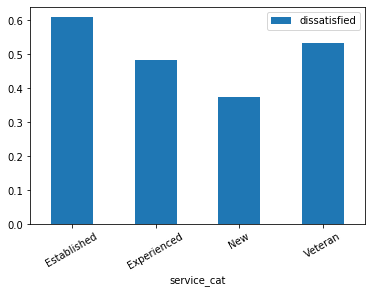

In [171]:
# Calculating percentage of employees who resigned dud to dissatisfaction
dissatisfied = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

%matplotlib inline
dissatisfied.plot(kind='bar', rot=30)

From the analysis done, we can conclude that the "Established" employees are more likely to quit over satisfaction or more employees in the "Established" category in theor career make up most of the employees who have resigned due to dissatisfaction in the workplace.

This is followed by "Veteran" Employees who are the second most likely to resign over dissatisfaction in the workplace. "New" employees, with less 3 years and less in the workplace are the least likely to resign over the dissatisfaction in the workplace.